In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../data/processed/df_filtre.csv', sep="\t", encoding="latin1")

In [3]:
df

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0,Lundi,0,Automne
1,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0,Lundi,0,Automne
2,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0,Lundi,0,Automne
3,BLEU,2014-09-01,01:30,38300.0,37800.0,37800.0,Lundi,0,Automne
4,BLEU,2014-09-01,02:00,37400.0,37400.0,37137.0,Lundi,0,Automne
...,...,...,...,...,...,...,...,...,...
224251,BLEU,2025-04-24,22:45,48348.0,48450.0,48824.0,Jeudi,0,Printemps
224252,BLEU,2025-04-24,23:00,48961.0,49000.0,48320.0,Jeudi,0,Printemps
224253,BLEU,2025-04-24,23:15,48478.0,48700.0,48274.0,Jeudi,0,Printemps
224254,BLEU,2025-04-24,23:30,47995.0,48400.0,47519.0,Jeudi,0,Printemps


In [4]:
df["Jour"].unique()

array(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi',
       'Dimanche'], dtype=object)

## Encodage des données
On utilisera pd.get_dummies() (encodage One-Hot) pour que ce soit compatible avec tous les modèles (même linéaires).

In [5]:
def encoder_variables_categorielles(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encode les colonnes catégorielles : 'Type de jour TEMPO', 'Jour', 'Saison' avec One-Hot Encoding.
    
    Args:
        df (pd.DataFrame): DataFrame contenant les colonnes catégorielles.

    Returns:
        pd.DataFrame: DataFrame avec les colonnes encodées.
    """
    colonnes_cat = ['Type de jour TEMPO', 'Jour', 'Saison']

    # Vérifie que ces colonnes existent
    colonnes_presentes = [col for col in colonnes_cat if col in df.columns]

    # Encodage One-Hot
    df_encoded = pd.get_dummies(df, columns=colonnes_presentes, drop_first=False)

    return df_encoded


In [6]:
encoded=encoder_variables_categorielles(df)
encoded

,Date,Heures,Prévision J,Prévision J-1,Consommation,Weekend,Type de jour TEMPO_BLANC,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE,Jour_Dimanche,Jour_Jeudi,Jour_Lundi,Jour_Mardi,Jour_Mercredi,Jour_Samedi,Jour_Vendredi,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été
0,2014-09-01,00:00,42500.0,42600.0,43320.0,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False
1,2014-09-01,00:30,40300.0,40300.0,41174.0,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False
2,2014-09-01,01:00,38000.0,37800.0,38430.0,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False
3,2014-09-01,01:30,38300.0,37800.0,37800.0,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,2014-09-01,02:00,37400.0,37400.0,37137.0,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224251,2025-04-24,22:45,48348.0,48450.0,48824.0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
224252,2025-04-24,23:00,48961.0,49000.0,48320.0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
224253,2025-04-24,23:15,48478.0,48700.0,48274.0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
224254,2025-04-24,23:30,47995.0,48400.0,47519.0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [7]:
encoded["Jour_Dimanche"].unique()

array([False,  True])

### Encodage de la colonne heure 
encodage sinusoïdal 

In [8]:
import numpy as np

def encoder_heure_circulaire(df, col='Heure'):
    # Convertir 'Heure' (ex: "00:00") en nombre de minutes depuis minuit
    df['Heure_minute'] = df[col].str.slice(0, 2).astype(int) * 60 + df[col].str.slice(3, 5).astype(int)

    # Normaliser entre 0 et 2π
    df['Heure_sin'] = np.sin(2 * np.pi * df['Heure_minute'] / 1440)
    df['Heure_cos'] = np.cos(2 * np.pi * df['Heure_minute'] / 1440)

    return df


In [9]:
df_h = encoder_heure_circulaire(encoded, col='Heures')
df_h

,Date,Heures,Prévision J,Prévision J-1,Consommation,Weekend,Type de jour TEMPO_BLANC,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE,Jour_Dimanche,...,Jour_Mercredi,Jour_Samedi,Jour_Vendredi,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été,Heure_minute,Heure_sin,Heure_cos
0,2014-09-01,00:00,42500.0,42600.0,43320.0,0,False,True,False,False,...,False,False,False,True,False,False,False,0,0.000000,1.000000
1,2014-09-01,00:30,40300.0,40300.0,41174.0,0,False,True,False,False,...,False,False,False,True,False,False,False,30,0.130526,0.991445
2,2014-09-01,01:00,38000.0,37800.0,38430.0,0,False,True,False,False,...,False,False,False,True,False,False,False,60,0.258819,0.965926
3,2014-09-01,01:30,38300.0,37800.0,37800.0,0,False,True,False,False,...,False,False,False,True,False,False,False,90,0.382683,0.923880
4,2014-09-01,02:00,37400.0,37400.0,37137.0,0,False,True,False,False,...,False,False,False,True,False,False,False,120,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224251,2025-04-24,22:45,48348.0,48450.0,48824.0,0,False,True,False,False,...,False,False,False,False,False,True,False,1365,-0.321439,0.946930
224252,2025-04-24,23:00,48961.0,49000.0,48320.0,0,False,True,False,False,...,False,False,False,False,False,True,False,1380,-0.258819,0.965926
224253,2025-04-24,23:15,48478.0,48700.0,48274.0,0,False,True,False,False,...,False,False,False,False,False,True,False,1395,-0.195090,0.980785
224254,2025-04-24,23:30,47995.0,48400.0,47519.0,0,False,True,False,False,...,False,False,False,False,False,True,False,1410,-0.130526,0.991445


Séparation des données x/Y


In [10]:
from sklearn.model_selection import train_test_split

# Supprimer les colonnes inutiles
colonnes_a_enlever = ['Date', 'Heures', 'Consommation', 'Prévision J', 'Prévision J-1']
X = df_h.drop(columns=colonnes_a_enlever)

# La cible
y = df_h['Consommation']

# Convertir les booléens True/False en 0/1
X = X.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


"Distribution de la variable cible (y_train)

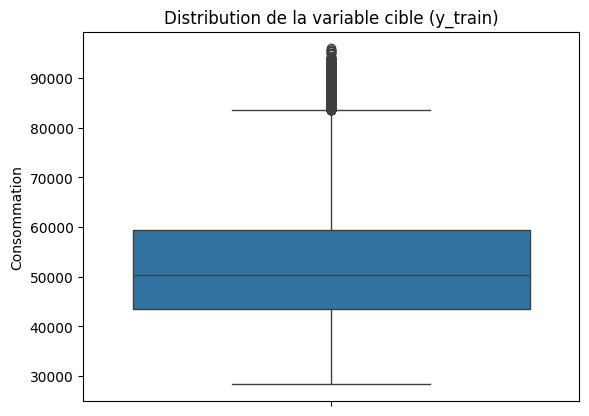

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y=y_train)
plt.title("Distribution de la variable cible (y_train)")
plt.show()


📌 1. Médiane élevée mais stable
La ligne noire au centre de la boîte représente la médiane (ici autour de 50 000).

Cela signifie que 50 % des valeurs sont inférieures à 50 000 et 50 % sont au-dessus.

📌 2. Boîte interquartile (IQR) entre ~40 000 et ~60 000
La boîte centrale contient les valeurs entre le 1er et 3e quartile (Q1-Q3).

En gros : la majorité des données sont entre 40 000 et 60 000, ce qui est plutôt homogène.

⚠️ 3. Présence de nombreux outliers (valeurs extrêmes)
Tous les points au-dessus des moustaches sont considérés comme des valeurs aberrantes (ici au-delà de ~83 000).

On voit qu’il y en a pas mal au-dessus de 90 000 !

Ces outliers peuvent tirer fortement vers le haut ton MSE et RMSE, car le RMSE pénalise beaucoup les grandes erreurs.


Explorer les outliers

In [12]:
q95 = y_train.quantile(0.95)
outliers = X_train[y_train > q95].copy()
outliers["Consommation"] = y_train[y_train > q95]
outliers

,Weekend,Type de jour TEMPO_BLANC,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE,Jour_Dimanche,Jour_Jeudi,Jour_Lundi,Jour_Mardi,Jour_Mercredi,Jour_Samedi,Jour_Vendredi,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été,Heure_minute,Heure_sin,Heure_cos,Consommation
7703,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,690,0,0,73423.0
112931,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1050,0,0,73610.0
6602,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,780,0,0,73872.0
7214,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,420,0,0,73478.0
42906,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1260,0,0,73819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129312,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,73762.0
179262,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,450,0,0,77788.0
40397,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,870,0,0,76604.0
41606,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1140,0,0,76889.0


Analyse de la hausse de consommation

In [13]:
def analyser_valeurs_hautes(df, quantile=0.95):
    # Définir le seuil de consommation haute
    seuil = df["Consommation"].quantile(quantile)
    df_haute = df[df["Consommation"] > seuil]

    print(f"🔺 Seuil haute consommation (quantile {quantile}) : {seuil:.2f}")
    print(f"📊 Nombre total de valeurs hautes : {len(df_haute)}\n")

    # Analyse weekend
    print("📅 Répartition des valeurs hautes selon le weekend :")
    weekend_counts = df_haute["Weekend"].value_counts(normalize=True) * 100
    print(weekend_counts.to_string(), "\n")

    # Analyse par saison
    print("🌦️ Répartition des valeurs hautes par saison :")
    saisons = ["Saison_Hiver", "Saison_Printemps", "Saison_Été"]
    for saison in saisons:
        pourcentage = df_haute[saison].mean() * 100
        print(f" - {saison.replace('Saison_', '')} : {pourcentage:.2f}%")

    print()

    # Analyse par jour de la semaine
    print("📆 Répartition des valeurs hautes par jour de la semaine :")
    jours = ["Jour_Lundi", "Jour_Mardi", "Jour_Mercredi", "Jour_Jeudi", "Jour_Vendredi", "Jour_Samedi","Jour_Dimanche"]
    for jour in jours:
        pourcentage = df_haute[jour].mean() * 100
        print(f" - {jour.replace('Jour_', '')} : {pourcentage:.2f}%")


In [14]:
analyser_valeurs_hautes(df_h)


🔺 Seuil haute consommation (quantile 0.95) : 73120.25
📊 Nombre total de valeurs hautes : 11213

📅 Répartition des valeurs hautes selon le weekend :
Weekend
0    92.214394
1     7.785606 

🌦️ Répartition des valeurs hautes par saison :
 - Hiver : 90.33%
 - Printemps : 4.00%
 - Été : 0.00%

📆 Répartition des valeurs hautes par jour de la semaine :
 - Lundi : 17.74%
 - Mardi : 19.66%
 - Mercredi : 19.08%
 - Jeudi : 18.86%
 - Vendredi : 16.86%
 - Samedi : 5.34%
 - Dimanche : 2.44%


In [15]:
def visualiser_valeurs_hautes(df, quantile=0.95):
    # Étape 1 : filtrer les valeurs hautes
    seuil = df["Consommation"].quantile(quantile)
    df_haute = df[df["Consommation"] > seuil]

    print(f"🔺 Seuil haute consommation (quantile {quantile}) : {seuil:.2f}")
    print(f"📊 Nombre total de valeurs hautes : {len(df_haute)}\n")

    # --- Graphique 1 : Weekend ---
    weekend_counts = df_haute["Weekend"].value_counts(normalize=True) * 100
    weekend_counts.index = weekend_counts.index.map({0: "Semaine", 1: "Weekend"})

    plt.figure(figsize=(6, 4))
    weekend_counts.plot(kind="bar", color="skyblue")
    plt.title("Répartition des valeurs hautes - Weekend")
    plt.ylabel("% des valeurs hautes")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- Graphique 2 : Saisons ---
    saisons = {
        "Saison_Hiver": "Hiver",
        "Saison_Printemps": "Printemps",
        "Saison_Été": "Été"
    }
    saison_vals = {saisons[col]: df_haute[col].mean() * 100 for col in saisons}

    plt.figure(figsize=(6, 4))
    plt.bar(saison_vals.keys(), saison_vals.values(), color="lightgreen")
    plt.title("Répartition des valeurs hautes - Saisons")
    plt.ylabel("% des valeurs hautes")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- Graphique 3 : Jours de la semaine ---
    jours = {
        "Jour_Lundi": "Lundi",
        "Jour_Mardi": "Mardi",
        "Jour_Mercredi": "Mercredi",
        "Jour_Jeudi": "Jeudi",
        "Jour_Vendredi": "Vendredi",
        "Jour_Samedi": "Samedi",
        "Jour_Dimanche": "Dimanche"
    }
    jour_vals = {jours[col]: df_haute[col].mean() * 100 for col in jours}

    plt.figure(figsize=(8, 4))
    plt.bar(jour_vals.keys(), jour_vals.values(), color="salmon")
    plt.title("Répartition des valeurs hautes - Jours de la semaine")
    plt.ylabel("% des valeurs hautes")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🔺 Seuil haute consommation (quantile 0.95) : 73120.25
📊 Nombre total de valeurs hautes : 11213



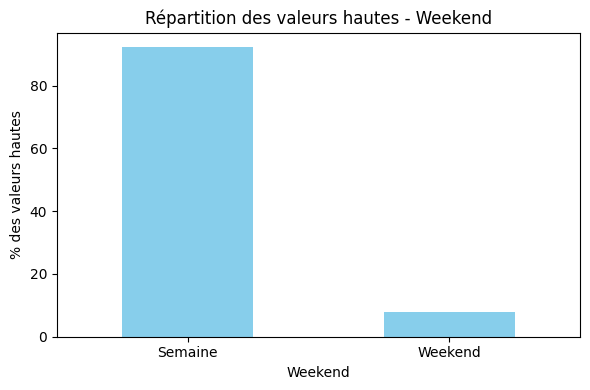

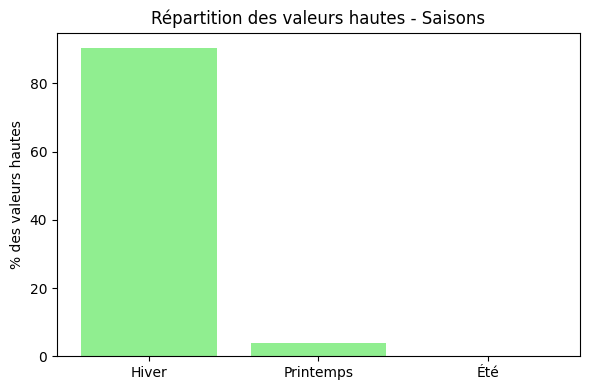

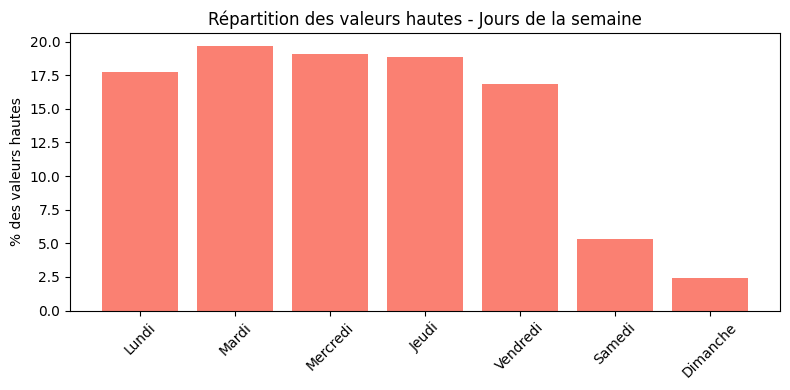

In [16]:
visualiser_valeurs_hautes(df_h)

In [17]:
print(df["Consommation"].max())
print(df["Consommation"].min())

96272.0
28344.0


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialiser le modèle
model = DecisionTreeRegressor(max_depth=10, random_state=42)
# 2. Entraîner sur les données d'entraînement
model.fit(X_train, y_train)

# 3. Prédire sur les données test
y_pred = model.predict(X_test)

# 4. Évaluer les performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"✅ Modèle : Arbre de décision")
print(f"📉 MSE : {mse:.2f}")
print(f"📉 RMSE : {rmse:.2f}")
print(f"📈 R² : {r2:.3f}")


✅ Modèle : Arbre de décision
📉 MSE : 31278558.15
📉 RMSE : 5592.72
📈 R² : 0.757


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Paramètres à tester
param_grid = {
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Modèle
dt = DecisionTreeRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

# Entraînement
grid_search.fit(X_train, y_train)

# Prédiction
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Meilleurs paramètres :", grid_search.best_params_)
print(f"📉 MSE : {mse:.2f}")
print(f"📉 RMSE : {rmse:.2f}")
print(f"📈 R² : {r2:.3f}")


✅ Meilleurs paramètres : {'max_depth': 25, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
📉 MSE : 30337560.31
📉 RMSE : 5507.95
📈 R² : 0.764


In [20]:
import matplotlib.pyplot as plt

def tracer_predictions(y_test, y_pred, nb_points=50):
    """
    Affiche une courbe comparant les valeurs réelles et prédites de la consommation.

    Args:
        y_test (array-like): Valeurs réelles.
        y_pred (array-like): Prédictions du modèle.
        nb_points (int): Nombre de points à afficher (pour lisibilité).
    """
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.values[:nb_points], label="Valeurs réelles", linewidth=2)
    plt.plot(y_pred[:nb_points], label="Prédictions", linewidth=2, linestyle='--')
    plt.title("Comparaison : Valeurs réelles vs Valeurs prédites")
    plt.xlabel("Échantillons (index)")
    plt.ylabel("Consommation")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


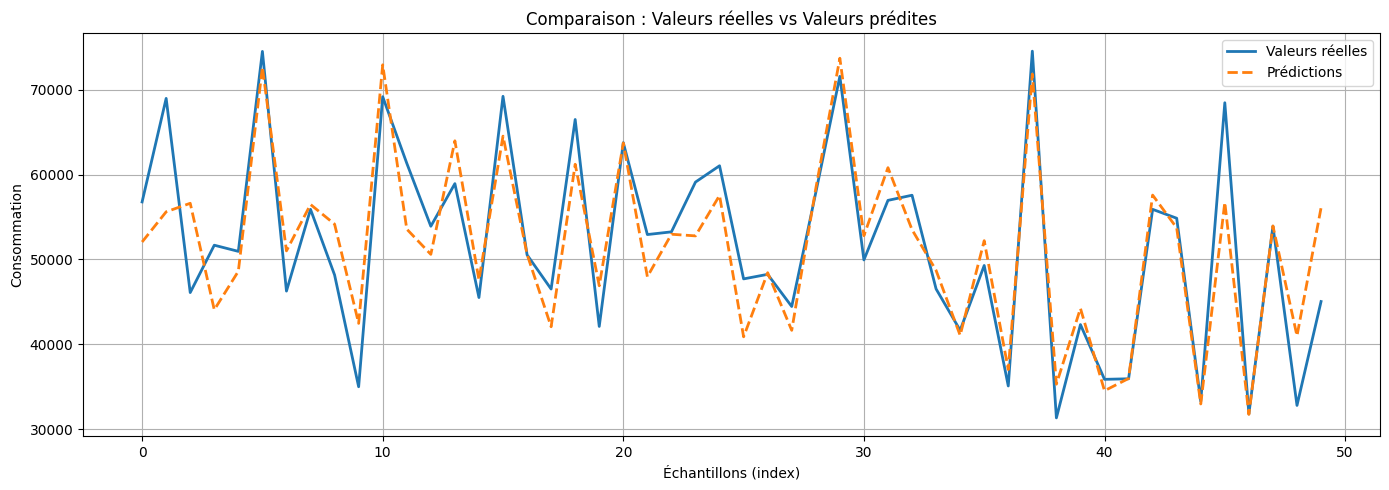

In [21]:
tracer_predictions(y_test, y_pred)


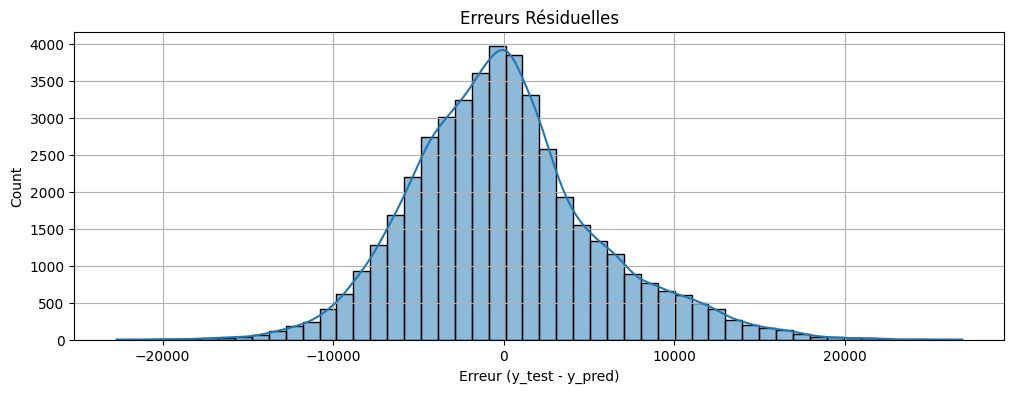

In [22]:
import seaborn as sns
def plot_residual_errors(y_true, y_pred, title="Erreurs Résiduelles"):
    """
    Trace les erreurs résiduelles d'un modèle de régression.
    
    Paramètres :
    - y_true : array-like
        Valeurs réelles de la variable cible.
    - y_pred : array-like
        Valeurs prédites par le modèle.
    - title : str
        Titre du graphique.
    
    """
    residuals = y_true - y_pred

    plt.figure(figsize=(12, 4))
    sns.histplot(residuals, bins=50, kde=True)
    plt.title(title)
    plt.xlabel("Erreur (y_test - y_pred)")
    plt.grid(True)
    plt.show()
plot_residual_errors(y_test, y_pred, title="Erreurs Résiduelles")

Erreurs Résiduelles
Les erreurs sont centrées autour de 0 → le modèle n'est pas biaisé (il ne sur- ou sous-estime pas systématiquement).

La forme est gaussienne (courbe en cloche) → bon signe !

La majorité des erreurs sont dans l’intervalle [−1500, +1500], ce qui montre une certaine précision.

### Partie 1 : Visualiser les features les plus influentes

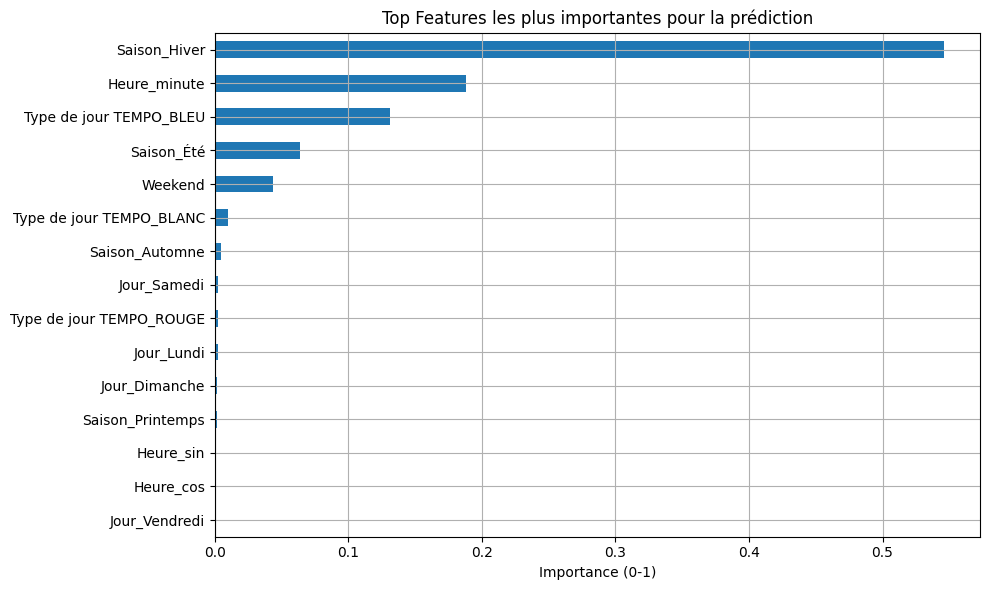

In [23]:
def afficher_importances(model, X_train, top_n=15):
    """
    Affiche les variables les plus importantes selon un modèle d’arbre.
    """
    importances = model.feature_importances_
    features = pd.Series(importances, index=X_train.columns)
    top_features = features.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title("Top Features les plus importantes pour la prédiction")
    plt.gca().invert_yaxis()
    plt.xlabel("Importance (0-1)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
afficher_importances(model, X_train, top_n=15)